# Plot curvilinear-grid model output

## Setting up the data

Referenced: 
- https://xgcm.readthedocs.io/en/latest/grid_topology.html
- https://xgcm.readthedocs.io/en/latest/example_mitgcm.html
- https://media.readthedocs.org/pdf/xgcm/latest/xgcm.pdf

In [1]:
%pylab inline
import xgcm, xarray

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = xarray.open_dataset('example_1degree_data/ocean.0001-0010.ssh.nc')

/Users/Esther/miniconda2/envs/grids/lib/python2.7/site-packages/xarray/coding/times.py:111: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netcdftime.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/Users/Esther/miniconda2/envs/grids/lib/python2.7/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netcdftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


## Examining the metadata 

In [3]:
data

<xarray.Dataset>
Dimensions:     (nv: 2, time: 10, xh: 360, yh: 320)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object    1-07-02 12:00:00    2-07-02 12:00:00 ...
  * xh          (xh) float64 -299.5 -298.5 -297.5 -296.5 -295.5 -294.5 ...
  * yh          (yh) float64 -77.77 -77.56 -77.34 -77.12 -76.9 -76.67 -76.44 ...
Data variables:
    ssh         (time, yh, xh) float32 ...
    time_bnds   (time, nv) timedelta64[ns] ...
    average_T1  (time) object ...
    average_T2  (time) object ...
    average_DT  (time) timedelta64[ns] ...
Attributes:
    filename:            ocean.0001-0010.ssh.nc
    title:               SPEAR_c96_o1_Control_1850_E50
    associated_files:    area_t: 00010101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  area_t
    comment:             FMS time averaging, version 3.0, precision=double

Upon inspecting our metadata, we can see our "data variable" is 'tos', which is mapped onto specific coordinates 'lat' and 'lon'. Alternatively, we can call `.variables` to view the variables contained in our data set and their attributes.

In [4]:
data.variables

Frozen(OrderedDict([(u'nv', <xarray.IndexVariable u'nv' (nv: 2)>
array([1., 2.])
Attributes:
    long_name:       vertex number
    units:           none
    cartesian_axis:  N), (u'ssh', <xarray.Variable (time: 10, yh: 320, xh: 360)>
[1152000 values with dtype=float32]
Attributes:
    long_name:      Sea Surface Height
    units:          m
    cell_measures:  area: area_t
    cell_methods:   area:mean yh:mean xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT), (u'time', <xarray.IndexVariable u'time' (time: 10)>
array([netcdftime._netcdftime.DatetimeJulian(1, 7, 2, 12, 0, 0, 7, -1, 1),
       netcdftime._netcdftime.DatetimeJulian(2, 7, 2, 12, 0, 0, 7, -1, 1),
       netcdftime._netcdftime.DatetimeJulian(3, 7, 2, 12, 0, 0, 7, -1, 1),
       netcdftime._netcdftime.DatetimeJulian(4, 7, 2, 0, 0, 0, 7, -1, 1),
       netcdftime._netcdftime.DatetimeJulian(5, 7, 2, 12, 0, 0, 7, -1, 1),
       netcdftime._netcdftime.DatetimeJulian(6, 7, 2, 12, 0, 0, 7, -1, 1),
       net

### Creating the grid
Here, we create a `Grid` object from the data, labeling `X` and `Y` as periodic based off the documentation

*Tried to get this working for a while, but for some reason face_connections just isn't a valid input?*

Clearly, looking at the source code, it is part of the initialization: https://github.com/xgcm/xgcm/blob/19b476c2cf6e44c9f6d9331b4bee8f38fd78a21a/xgcm/grid.py

In [5]:
face_connections = {'face': {0: {'X': (None, (1, 'X', False))},
                                 1: {'X': ((0, 'X', False), None)}}}

In [6]:
grid = xgcm.Grid(data)

In [7]:
N = 25
ds = xarray.Dataset({'data_c': (['face', 'y', 'x'], np.random.rand(2, N, N))},
                    coords={'x': (('x',), np.arange(N), {'axis': 'X'}),
                            'xl': (('xl'), np.arange(N)-0.5,
                                   {'axis': 'X', 'c_grid_axis_shift': -0.5}),
                            'y': (('y',), np.arange(N), {'axis': 'Y'}),
                            'yl': (('yl'), np.arange(N)-0.5,
                                   {'axis': 'Y', 'c_grid_axis_shift': -0.5}),
                            'face': (('face',), [0, 1])})

In [8]:
face_connections = {'face': {0: {'X': (None, (1, 'X', False))},
                                 1: {'X': ((0, 'X', False), None)}}}

In [9]:
grid = xgcm.Grid(ds, face_connections=None)

TypeError: __init__() got an unexpected keyword argument 'face_connections'

In [16]:
grid.__attrs__

AttributeError: 'Grid' object has no attribute '__attrs__'

## Plotting the data

We can view the contents of `tos` by simply calling it.

In [8]:
grid._attrs

AttributeError: 'Grid' object has no attribute '_attrs'

Again, we see that each `tos` value corresponds to a `lat`, `lon` coordinate pair. We can plot `tos` using the following plot command. Additionally, we add a color bar to our plot.

TypeError: Illegal arguments to pcolormesh; see help(pcolormesh)

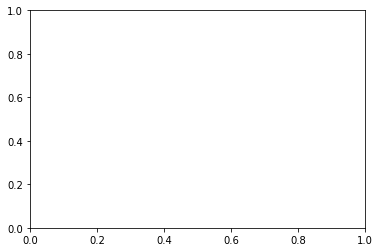

In [4]:
plt.pcolormesh(data['xh'], data['yh'])
plt.colorbar()